# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Raphael Azevedo </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm

In [15]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [16]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [17]:
df['Hemisfério'] = np.where(df['Latitude']>0, 'Norte', 'Sul')
df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
5,01/10/1965,13:36:32,-13.4050,166.6290,Earthquake,35.00,NaN,NaN,6.7,MW,...,NaN,NaN,NaN,NaN,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
6,01/12/1965,13:32:25,27.3570,87.8670,Earthquake,20.00,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic,Norte
7,01/15/1965,23:17:42,-13.3090,166.2120,Earthquake,35.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul
8,01/16/1965,11:32:37,-56.4520,-27.0430,Earthquake,95.00,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic,Sul
9,01/17/1965,10:43:17,-24.5630,178.4870,Earthquake,565.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic,Sul


## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

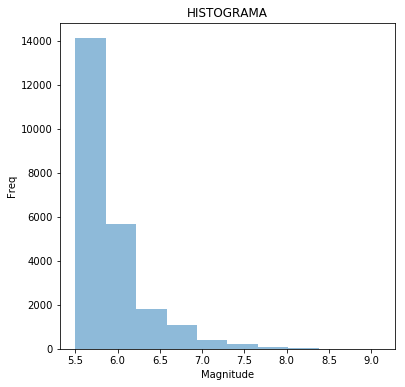

In [18]:
#faixa = np.arange(0,100,1)
plot = df.Magnitude.plot.hist(title='HISTOGRAMA', normed=0, figsize=(6, 6), alpha=0.5)
plt.ylabel('Freq')
plt.xlabel('Magnitude')

#Analisando o Histograma obtido, podemos observar que a frequência (no nosso dataframe) de abalos de magnitude 5.5,
#é muito maior que de abalos de demais magnitudes. Podemos então dizer que abalos de magnitude 5.5 são muito mais comuns,
#equanto abalos de magnitude 7.0 em diante são bem raros.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [19]:
loc, scale = expon.fit(df["Magnitude"])
print(loc, scale)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

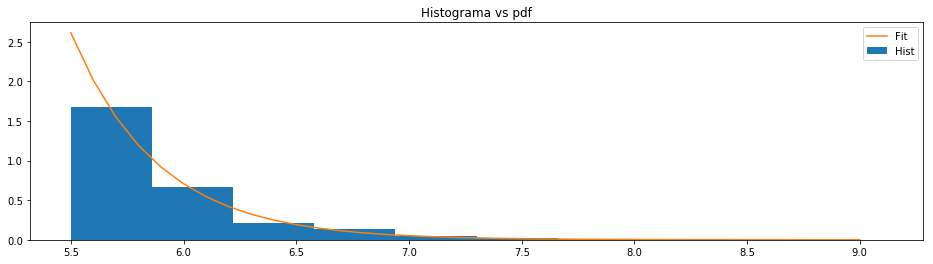

In [66]:
fig, ax = plt.subplots(1, figsize = (16,4))
ax.hist(df["Magnitude"], normed = True)
x = np.arange(df["Magnitude"].min(), df["Magnitude"].max(), 0.1)
ax.plot(x, expon.pdf(x, loc, scale))
ax.set_title('Histograma vs pdf')
ax.legend(['Fit', 'Hist'])

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [21]:
crustab = pd.crosstab(df.Hemisfério, df.Type, normalize=True)
crustab

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
Hemisfério,,,,
Norte,0.447121,0.000085,0.006279,0.000000
Sul,0.545191,0.000085,0.001196,0.000043


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [28]:
ProbNort = (0.447121+0.000085+0.006279+0)/(1)
print(ProbNort*100)

45.348499999999994


Explique o seu raciocínio

A probabilidade de ocorrer um terremoto no hemisfério norte é a quantidade de terremotos que ocorreram no norte (no caso acima em porcentagem), dividido pela quantidade total de terremotos.

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [24]:
#P(NE|HemisN) = P(NE n HesmisN)/P(HemissN)
PNEdqHN = 0.006279/(0.447121+0.000085+0.006279)
print(PNEdqHN*100)

1.3846102958201485


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

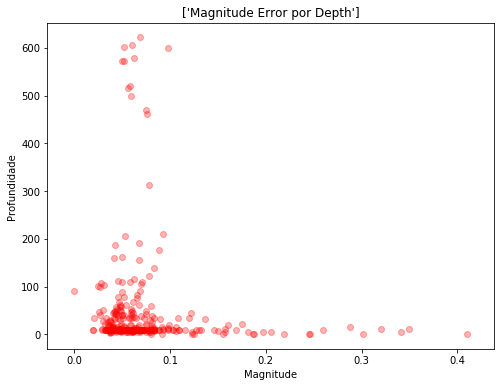

In [36]:
fig = plt.figure(figsize=(8,6))
plt.scatter(df["Magnitude Error"], df.Depth, c="red", alpha=0.3)
plt.ylabel('Profundidade')
plt.xlabel('Magnitude')
plt.title(["Magnitude Error por Depth"])

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [26]:
df["Magnitude Error"].corr(df.Depth)

-0.076918438923387206

In [38]:
df.Depth.corr(df["Magnitude Error"])

-0.076918438923387192

Explique o que significa o valor da correlação calculada acima? 

In [ ]:
A correlação vai de -1 ate 1, quanto mais proximo de 0 mais não correlados são os dados. 
No caso acreditasse que o erro de Magnitude não é muito dependente da profundidade profundidade.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [48]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

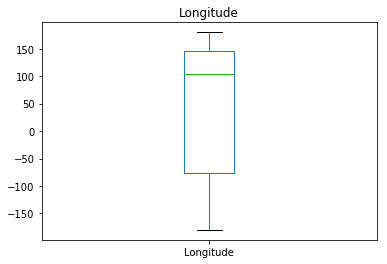

In [32]:
plot2 = df.Longitude.plot(kind='box', title='Longitude')

Podemos ver a partir desse boxplot e do describe, que 50% dos abalos sísmicos se dão entre -76.349750 e 145.026250, com uma distribuição mais voltada para a longitude 103.982000, ou seja, considerando maioria dos abalos sísmicos, eles mais comumente ocorreram perto dessa longitude.

In [49]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

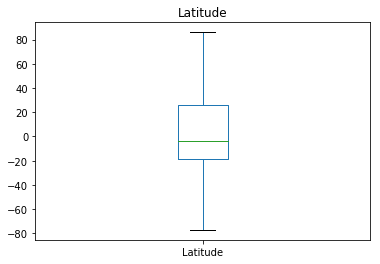

In [39]:
plot3 = df.Latitude.plot(kind='box', title='Latitude')

Podemos ver a partir desse boxplot e do describe, que 50% dos abalos sísmicos se dão entre -18.653000 e 26.190750, com uma distribuição mais voltada para a latitude -3.568500, ou seja, considerando maioria dos abalos sísmicos, eles mais comumente ocorreram perto dessa latitude.

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [45]:
MBfilter = df[df["Magnitude Type"] == 'MB'] 
DFcut = MBfilter[MBfilter.Type == 'Nuclear Explosion']
DFcut

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hemisfério
2797,07/23/1973,01:22:58,49.986,78.853,Nuclear Explosion,0.0,NaN,NaN,6.3,MB,...,NaN,NaN,NaN,NaN,USP00002TP,US,US,US,Reviewed,Norte
2859,09/12/1973,06:59:54,73.302,55.161,Nuclear Explosion,0.0,NaN,NaN,6.8,MB,...,NaN,NaN,NaN,NaN,USP00003DP,US,US,US,Reviewed,Norte
2876,09/27/1973,06:59:58,70.756,53.872,Nuclear Explosion,0.0,NaN,NaN,6.0,MB,...,NaN,NaN,NaN,NaN,USP00003K1,US,US,US,Reviewed,Norte
2897,10/27/1973,06:59:57,70.779,54.177,Nuclear Explosion,0.0,NaN,NaN,6.9,MB,...,NaN,NaN,NaN,NaN,USP00003YA,US,US,US,Reviewed,Norte
2951,12/14/1973,07:46:57,50.036,79.011,Nuclear Explosion,0.0,NaN,NaN,6.0,MB,...,NaN,NaN,NaN,NaN,USP00004HT,US,US,US,Reviewed,Norte
3126,05/31/1974,03:26:57,49.952,78.844,Nuclear Explosion,0.0,NaN,NaN,5.9,MB,...,NaN,NaN,NaN,NaN,USP00006K2,US,US,US,Reviewed,Norte
3205,08/14/1974,14:59:58,68.913,75.899,Nuclear Explosion,0.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,USP00007MB,US,US,US,Reviewed,Norte
3218,08/29/1974,09:59:55,73.366,55.094,Nuclear Explosion,0.0,NaN,NaN,6.4,MB,...,NaN,NaN,NaN,NaN,USP00007UG,US,US,US,Reviewed,Norte
3269,10/16/1974,06:32:57,49.972,78.968,Nuclear Explosion,0.0,NaN,NaN,5.5,MB,...,NaN,NaN,NaN,NaN,USP00008EC,US,US,US,Reviewed,Norte
3286,11/02/1974,04:59:57,70.817,54.063,Nuclear Explosion,0.0,NaN,NaN,6.7,MB,...,NaN,NaN,NaN,NaN,USP00008N6,US,US,US,Reviewed,Norte


In [64]:
ProbFinal = (DFcut.Hemisfério.value_counts(sort=False,normalize=True)*100).round(decimals=3)

In [65]:
ProbFinal

Sul      17.178
Norte    82.822
Name: Hemisfério, dtype: float64

Quando comparamos as probabilidades obtidas apos cruzar informações do dataframe, percebemos que a probabilidade de que tenha sido no norte é muito maior do que a probabilidade de que tenha sido no sul. Portanto podemos dizer que é provável que tenha sido no norte.